# Functional Enrichment Analysis

Author: Ashley Schwartz

Date: October 2023

## Purpose and Background

This tutorial goes over how to retrieve the genes in a particular pathway from the Kyoto Encyclopedia of Genes and Genomes (KEGG), retrieve the genes in a particular function from Gene Ontology (GO), and perform gene enrichment analysis on these gene sets using a variety of different methods.

**Databases Supported**

| Database   | Abbreviation | Description   | Link |
|------|--------------|------------------|-------------------|
| Kyoto Encyclopedia of Genes and Genomes Pathway Database | KEGG Pathway | Molecular pathways and interactions              | [link](https://www.genome.jp/kegg/pathway.html)        |
| Kyoto Encyclopedia of Genes and Genomes Disease Database | KEGG Disease | Genes and pathways associated with diseases      | [link](https://www.genome.jp/kegg/disease/)           |
| Gene Ontology Biological Process Database                | GO BP        | Molecular events in biological processes         | [link](http://geneontology.org/docs/ontology-documentation/#biological-process-ontology-bp) |
| Gene Ontology Cellular Component Database                | GO CC        | Cellular structures and locations                | [link](http://geneontology.org/docs/ontology-documentation/#cellular-component-ontology-cc) |
| Gene Ontology Molecular Function Database                | GO MF        | Specific activities or functions of gene products | [link](http://geneontology.org/docs/ontology-documentation/#molecular-function-ontology-mf) |

**Database Naming Conventions**

Each database follows naming conventions for their pathways and functions. For a quick overview of how each database names a particular pathway or function, we provide some examples here:

| Database      | ID Format      | Example ID   | Pathway/Function Name | Notes |
|---------------|----------------|--------------|-----------------------|-------|
| KEGG Pathway  | Numeric with Prefix | dre00120 (Zebrafish), hsa00120 (Human)| Primary bile acid biosynthesis | KEGG pathway IDs are species-specific.|
| KEGG Disease  | Alphanumeric  | H00001 (Human) | B-cell acute lymphoblastic leukemia | KEGG disease IDs are identified for human and are not defined for zebrafish.|
| GO BP         | Alphanumeric  | GO:0007165 | Signal transduction | GO BP IDs are unique to each species.|
| GO CC         | Alphanumeric  | GO:0005634 | Nucleus | GO CC IDs are unique to each species.|
| GO MF         | Alphanumeric  | GO:0003824 | Catalytic activity | GO MF IDs are unique to each species.|

**Enrichment Methods Supported**

| Enrichment Method     | Description                                                      |
|-----------------------|------------------------------------------------------------------|
| Fisher's Exact Test   | A statistical method for assessing the significance of gene enrichment within predefined functional categories or pathways using categorical gene set data. |
| Logistic Regression    | A modeling technique for predicting gene enrichment in specific functional categories, offering flexibility to handle diverse data types within gene sets. This method does not depend on a p-value cutoff for gene significance.|

**Organisms Supported**

`danRerLib` is built for zebrafish and supports three organism types:

The table you've provided is clear and informative, but there appears to be a minor typographical error in the descriptions for "zebrafish" and "mapped zebrafish." Here's a corrected version:

**Organisms Supported**

`danRerLib` is built for zebrafish and supports three organism types:

| Organism       | Abbreviation | Description                               |
| ---------------|--------------| ------------------------------------------|
| Zebrafish      | 'dre'        | The zebrafish taxonomy                     |
| Human          | 'hsa'        | The human taxonomy                         |
| Mapped Zebrafish | 'dreM'      | An organism defined through orthology     |


## Requirements

In this tutorial we will be utilizing:
- the required python package
    - see install notes if not currently installed.


In [1]:
# IMPORT PYTHON PACKAGE
# ---------------------
from danrerlib import KEGG, utils, GO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Download Gene Sets

If you are interested in identifying the genes within a gene set, you can download genes for a given KEGG pathway id, KEGG disease id, or GO id (BP, CC, or MF). A key benefit and advantage to `danRerLib` is we can also generate the gene list for a pathway that might not exist for zebrafish, but does exist for human. We can then map the genes to zebrafish genes if desired.

### KEGG Pathway

_Purpose: Given a KEGG pathway id, retrieve a list of all genes in said pathway._

As a reminder, `danRerLib` supports three organism types (see background for more information): hsa, dre, and dreM. Of course, you are likely most interested in the zebrafish genes, but human genes are also provided for comparisons. Lets look at the KEGG pathway `00400` which is defined as phenylalanine, tyrosine and tryptophan biosynthesis. This pathway exists for human `hsa00400` and zebrafish `dre00400`. Here are a few examples of gathering the genes in this pathway for different organisms:

In [2]:
kegg_id = '00400'
human_genes = KEGG.get_genes_in_pathway(kegg_id, 'hsa')
human_genes

,Human NCBI Gene ID
0,137362
1,259307
2,2805
3,2806
4,5053
5,6898


In [3]:
dre_genes = KEGG.get_genes_in_pathway(kegg_id, 'dre')
dre_genes

,NCBI Gene ID
0,335974
1,337166
2,378962
3,406330
4,406688
5,561410
6,791730


In [4]:
mapped_genes = KEGG.get_genes_in_pathway(kegg_id, 'dreM')
mapped_genes

,NCBI Gene ID
0,561410
1,335974
2,337166
3,378962
4,406330
5,406688
6,791730


It is also possible to include the organism identifier in the KEGG id sent to the function and omit the organism identifier. As an example of this, see below where we only provide the full KEGG id desired.

In [5]:
KEGG.get_genes_in_pathway('hsa00400')

,Human NCBI Gene ID
0,137362
1,259307
2,2805
3,2806
4,5053
5,6898


### KEGG Disease

_Purpose: Given a KEGG disease id, retrieve a list of all genes in said disease._

We can also get the list of genes for a particular disease listed in the KEGG database. This function takes the disease id and the organism. Not that the zebrafish organism in this case comes from mapped values as the disease gene lists are not annotated for zebrafish within the KEGG database. 

In [6]:
# human organism
KEGG.get_genes_in_disease('H00001', 'hsa')

,Human NCBI Gene ID
0,25
1,4297
2,4299
3,6929
4,5087
5,861
6,4609
7,64109
8,5079


In [7]:
# zebrafish organism
KEGG.get_genes_in_disease('H00001', 'dre')

,NCBI Gene ID
0,100000720
1,557048
2,100537394
3,664768
4,30310
5,58138
6,570960
7,58126
8,393141
9,30686


It is expected, as described in the mapping tutorial, that the number of genes in the human gene set may not always be equal to the number of genes in the zebrafish set. This is because there is not always a 1:1 mapping in orthology between human ans zebrafish taxonomy. 

### Gene Ontology

_Purpose: Given a Go concept id, retrieve a list of all genes in said GO concept._

`danRerLib` supports Gene Ontology Biological Processes (BP), Cellular Components (CC), and Molecular Functions (MF). There is one primary function for the GO module that will retrieve the genes in any given concept, regardless if it comes from BP, CC, or MF. This can be done for either organism (hsa, dre, or dreM). Retrieval of the GO id `GO:0033554`, cellular response to stress, is shown below for the zebrafish. 

In [8]:
# zebrafish organism
GO.get_genes_in_GO_concept('GO:0033554', 'dre')

,ZFIN ID
0,ZDB-GENE-030131-8638
1,ZDB-GENE-091204-246
2,ZDB-GENE-040718-255
3,ZDB-GENE-050320-35
4,A0A2R8S050
5,ZDB-GENE-030131-6701
6,ZDB-GENE-040825-4
7,ZDB-GENE-030131-1096
8,ZDB-GENE-030131-9531
9,ZDB-GENE-030826-18


## Conduct Functional Enrichment Analysis

Functional enrichment analysis is a powerful method for uncovering biological insights from a set of genes. Whether you have a specific gene set of interest or an entire dataset, you are able to perform functional enrichment analysis on pathways from KEGG and Gene Ontology. In this section, we'll explore different scenarios, from analyzing a small gene set to conducting enrichment analysis on a larger scale using the danRerLib package. 

### Enrichment Module Overview

**Import Enrichment Module**

In [9]:
from danrerlib.enrichment import enrich_fishers, enrich_logistic

# can also import as:
# from danrerlib import enrichment

# import a module to help with plotting
from danrerlib import enrichplots

# just a notebook display option
from IPython.display import Markdown

**Recommended Data Format:** The functional enrichment package is designed to take in your differential expression results and output the pathways significantly altered. Therefore, your data should include every gene detected from your study, the associated p-value that defines significance of differential expression (Recommended to be an adjusted p-value), and the log2FC (or another metric that defines up/down regulation of the gene). This minimizes the work from the user with regard to data filtering for directional tests and background gene sets. The **required** data format is:

| Gene ID | p-value | log2FC | 
| --- | --- | --- | 
| any supported gene id type: NCBI Gene ID, ZFIN ID, Ensembl ID, Symbol | 0 < p-value < 1 | positive or negative |

*The data is required to have the gene id in the first column, the pvalue in the second, and the log2FC in the third. The column names can be defined by the user._*

The data I will be using in this tutorial is a publicly available differential expression dataset from the Gene Expression Omnibus (GSE:...). The study investigated the effects of the chemical TPP on the developing zebrafish and obtained whole-embryo RNA-sequencing.

**Required Parameters**

| Parameter Name | Parameter Type | Parameter Description | 
| -- | -- | -- |
| `gene_universe` | `pd.DataFrame` | A DataFrame containing gene information, including gene IDs, p-values, and log2FC. |
| `database` | `str or list[str]` | The functional annotation database(s). Options include:'KEGG Pathway', 'KEGG Disease', 'GO BP', 'GO CC', 'GO MF', 'GO' (all GO databases), 'all' ( all databases). Can also input a list of databases, as an example: ['KEGG Pathway', KEGG Disease']|
| `gene_id_type` | `str` | The type of gene ID in the gene universe. The recommended gene id type is NCBI Gene ID (NCBI_ID). Must be one of: NCBI Gene ID, ZFIN ID, Ensembl ID, Symbol, or for human: Human NCBI Gene ID. | 

**Advanced, Optional Parameters**

| Parameter Name | Parameter Type | Parameter Description | 
| -- | -- | -- |
| `org` | `str` | The organism code ('dre' for zebrafish, 'dreM' for mapped zebrafish, 'hsa' for human). Choose `dreM` if you would like to preform enrichment via orthology. Default is `dre` | 
| `direction` | `str` |  The direction of statistical test for enrichment ('up', 'down', or 'both'). If you choose `up` for example, you will be able to test if the gene set is significantly up-regulated. Default is 'both'. | 
| `sig_gene_cutoff_pvalue ` | `float` | The significance cutoff for gene inclusion based on p-values. Default is 0.05. | 
| `log2FC_cutoff_value` |  `float` | The log2 fold change cutoff value for gene inclusion. Default is 0. | 
| `min_num_genes_in_concept` | `int` | The minimum number of genes in a concept for it to be considered. Default is 10. |
| `concept_ids`  | `list` | A list of concept IDs (e.g., pathway IDs or disease IDs) to analyze. Include this if you are interested in testing a specific amount of concept IDs. Default is None.
| `background_gene_set` | `pd.DataFrame` | A DataFrame representing a background gene set. Include if your gene universe does not contain all genes detected. Default is None. |
| `sig_conceptID_cutoff_pvalue` | `float` | The significance cutoff for concept IDs based on p-values that will be returned to you. Default is 0.05. | 
| `include_all`  | `bool` | Include all results without filtering based on significance. Default is False. |
| `order_by_p_value` |  `bool` |  Whether to order the results by p-value. Default is True. | 

### Functional Enrichment with Fisher's Exact Test

_Purpose: Conduct functional enrichment analysis using Fisher's Exact Test to identify overrepresented pathways associated with a set of genes._

This method is ideal for scenarios where you have a gene set of interest and want to explore the significant enrichment of pathways from databases like KEGG and Gene Ontology. The Fisher's Exact Test helps reveal statistically significant relationships between the gene set and specific pathways.

#### Overview of Fisher's Exact Test for Overrepresentation

**Contingency Table:**

Consider a scenario where we are assessing the enrichment of a specific KEGG Pathway (let's call it "Pathway A") in a set of differentially expressed genes. The contingency table could look like this:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{In Pathway A} & \text{Not In Pathway A} \\
\hline
\text{Significantly Expressed} & a & b \\
\hline
\text{Not Significantly Expressed} & c & d \\
\hline
\end{array}
$$

In this table:

- $a$ is the number of genes both in the pathway and significantly expressed.
- $b$ is the number of genes not in the pathway but significantly expressed.
- $c$ is the number of genes in the pathway but not significantly expressed.
- $d$ is the number of genes neither in the pathway nor significantly expressed.

**Statistical Formulas:**

1. **Odds Ratio:**

    $$\text{Odds Ratio} = \frac{ad}{bc}$$

2. **Fisher's Exact Test:**

    $$P(X \leq a) = \frac{\binom{a+b}{a} \binom{c+d}{c}}{\binom{N}{a+c}}$$

    where $N = a+b+c+d$ is the total number of genes.

3. **P-value Calculation:**

    $$P(\text{Observed or More Extreme}) = \sum_{I=0}^{a} \frac{\binom{a+b}{i} \binom{c+d}{a-i}}{\binom{N}{a+c}}$$

    A low p-value suggests that the observed distribution is unlikely to occur by random chance, indicating potential enrichment or depletion.

#### Primary Function and Unique Parameters

The primary function is `enrich_fishers` with all the required and advanced parameters discussed above in addition to one unique parameter, `direction`.

| Parameter Name | Parameter Type | Parameter Description | 
| -- | -- | -- |
| `direction` | `str` |  The direction of statistical test for enrichment ('up', 'down', or 'non-directional'). If you choose `up` for example, you will be able to test if the gene set is significantly up-regulated. Default is 'non-directional'. | 

#### Conduct Fishers Exact Test for Enrichment Analysis (enriched/depleted)

**Step 1:** Loading Data. Data should be loaded into a Pandas Dataframe with the structure as describes above. This is defined as your `gene_universe_tpp` as is contains all genes detected in your study.

In [10]:
gene_universe_tpp = pd.read_csv('data/test_data/TPP_DE.txt', sep = '\t')

To get a sneak peak about what the data looks like, we can look at the first 5 elements:

In [11]:
gene_universe_tpp.head(5)

,NCBI Gene ID,PValue,logFC
0,100000006,0.792615,0.115009
1,100000009,0.607285,-0.144714
2,100000026,0.021338,0.603871
3,100000030,0.007880,-2.083141
4,100000044,0.015286,0.803879


**Step 2:** Define necessary parameters and choices. To run the enrichment function, there are some key parameters you have the option of using (see above). 

In [12]:
# the gene id type you have in your gene universe. 
# In this case, we have NCBI Gene IDs. 
ncbi_id = 'NCBI Gene ID'

# the database you wish to test enrichment for 
database_choice = 'KEGG Pathway'

**Step 3:** Run enrichment function.

In [13]:
result = enrich_fishers(gene_universe = gene_universe_tpp, 
                database = database_choice, 
                gene_id_type = ncbi_id,
                )

**Step 4** Visualize results. In this case, we assessed whether or not a KEGG Pathway was enriched or depleted. This means was there significant up and/or down regulation of a pathway. 

In [14]:
# count the number of significantly altered pathways
num_altered = len(result)
num_enriched = len(result[result['Direction'] == 'enriched'])
num_depleted = len(result[result['Direction'] == 'depleted'])

print(f'The total number of altered pathways is {num_altered}, the number enriched is {num_enriched}, and the number depleted is {num_depleted}.')

The total number of altered pathways is 28, the number enriched is 25, and the number depleted is 3.


In [15]:
%%capture
# visualize the top 5 most significantly altered KEGG pathways
# Markdown(result.head(5).to_markdown())
result.head(5)

|    | Concept Type   | Concept ID   | Concept Name                                |   # Genes in Concept in Universe |   # Sig Genes Belong to Concept |   Proportion of Sig Genes in Set |   Odds Ratio |     P-value | Direction   |
|---:|:---------------|:-------------|:--------------------------------------------|---------------------------------:|--------------------------------:|---------------------------------:|-------------:|------------:|:------------|
|  0 | KEGG Pathway   | dre00030     | Pentose phosphate pathway                   |                               29 |                              15 |                         0.517241 |      4.87263 | 4.13465e-05 | enriched    |
|  1 | KEGG Pathway   | dre04512     | ECM-receptor interaction                    |                              101 |                              35 |                         0.346535 |      2.41698 | 7.11217e-05 | enriched    |
|  2 | KEGG Pathway   | dre04141     | Protein processing in endoplasmic reticulum |                              190 |                              54 |                         0.284211 |      1.81138 | 0.000419319 | enriched    |
|  3 | KEGG Pathway   | dre04010     | MAPK signaling pathway                      |                              377 |                              95 |                         0.251989 |      1.54043 | 0.000544843 | enriched    |
|  4 | KEGG Pathway   | dre04510     | Focal adhesion                              |                              264 |                              69 |                         0.261364 |      1.61511 | 0.00121163  | enriched    |

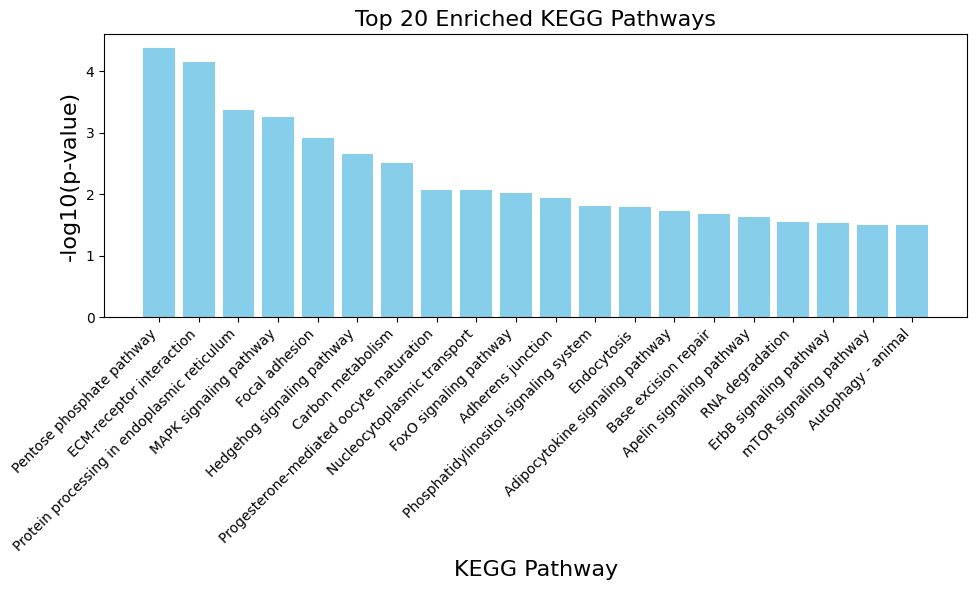

In [16]:
# create a bar chart to visualize the enriched results
enriched_results = result[result['Direction'] == 'enriched']

enrichplots.bar_chart(enriched_results, 
                      title = 'Top 20 Enriched KEGG Pathways', 
                      xlab = 'KEGG Pathway',
                      max_num_pathways=20)

**Step 5** Interpretation. Interpret the results based on the direction of enrichment. Consider the biological context of the pathways and their relevance to your study.

For example, the Pentose phosphate pathway is significantly enriched in the set of genes that are differentially expressed in zebrafish exposed to TPP. The odds ratio of 4.87 and a very low p-value (0.000041) suggest a strong association between the pathway and the significant genes. The term "enriched" indicates that there is an overrepresentation of significant genes in this pathway compared to what would be expected by chance.

#### Testing for Upregulated Pathways

**Contingency Table for Upregulated Genes:**

Assume we are interested in assessing whether a KEGG Pathway (let's call it "Pathway A") is enriched with _upregulated genes_. The contingency table for this scenario would be:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{In Pathway A} & \text{Not In Pathway A} \\
\hline
\text{Upregulated} & a & b \\
\hline
\text{Not Upregulated} & c & d \\
\hline
\end{array}
$$

Here:
- $a$ is the number of genes both in the pathway and upregulated.
- $b$ is the number of genes not in the pathway but upregulated.
- $c$ is the number of genes in the pathway but not upregulated.
- $d$ is the number of genes neither in the pathway nor upregulated.


**Step 1:** Load the data. We will use the same dataset as before.

In [17]:
gene_universe_tpp = pd.read_csv('data/test_data/TPP_DE.txt', sep = '\t')

**Step 2:** Define necessary parameters and choices. The key difference here is the test direction.

In [18]:
# same as before
ncbi_id = 'NCBI Gene ID'
database_choice = 'KEGG Pathway'

# define the directional test
test_direction = 'up'

**Step 3** Run enrichment function.

In [19]:
upregulated_results = enrich_fishers(gene_universe = gene_universe_tpp, 
                        gene_id_type = ncbi_id,
                        database = database_choice, 
                        direction = test_direction   
                        )

**Step 4** Visualize results. In this case, we assessed whether or not a KEGG Pathway was upregulated. 

In [20]:
# count the number of significantly altered pathways
num_upregulated = len(upregulated_results)

print(f'The total number of up-regulated pathways is {num_upregulated}.')

The total number of up-regulated pathways is 13.


In [21]:
%%capture
# visualize the top 5 most significantly altered KEGG pathways
# Markdown(result.head(5).to_markdown())
result.head(5)

|    | Concept Type   | Concept ID   | Concept Name                          |   # Genes in Concept in Universe |   # Sig Genes Belong to Concept |   Proportion of Sig Genes in Set |   Odds Ratio |     P-value | Direction    |
|---:|:---------------|:-------------|:--------------------------------------|---------------------------------:|--------------------------------:|---------------------------------:|-------------:|------------:|:-------------|
|  0 | KEGG Pathway   | dre04010     | MAPK signaling pathway                |                              377 |                              64 |                         0.169761 |      2.01456 | 1.97328e-06 | upregulated |
|  1 | KEGG Pathway   | dre04144     | Endocytosis                           |                              325 |                              47 |                         0.144615 |      1.65448 | 0.00175717  | upregulated |
|  2 | KEGG Pathway   | dre04140     | Autophagy - animal                    |                              180 |                              28 |                         0.155556 |      1.79722 | 0.00509073  | upregulated |
|  3 | KEGG Pathway   | dre04012     | ErbB signaling pathway                |                              104 |                              18 |                         0.173077 |      2.03876 | 0.00756464  | upregulated |
|  4 | KEGG Pathway   | dre04070     | Phosphatidylinositol signaling system |                              117 |                              19 |                         0.162393 |      1.88829 | 0.0121393   | upregulated |

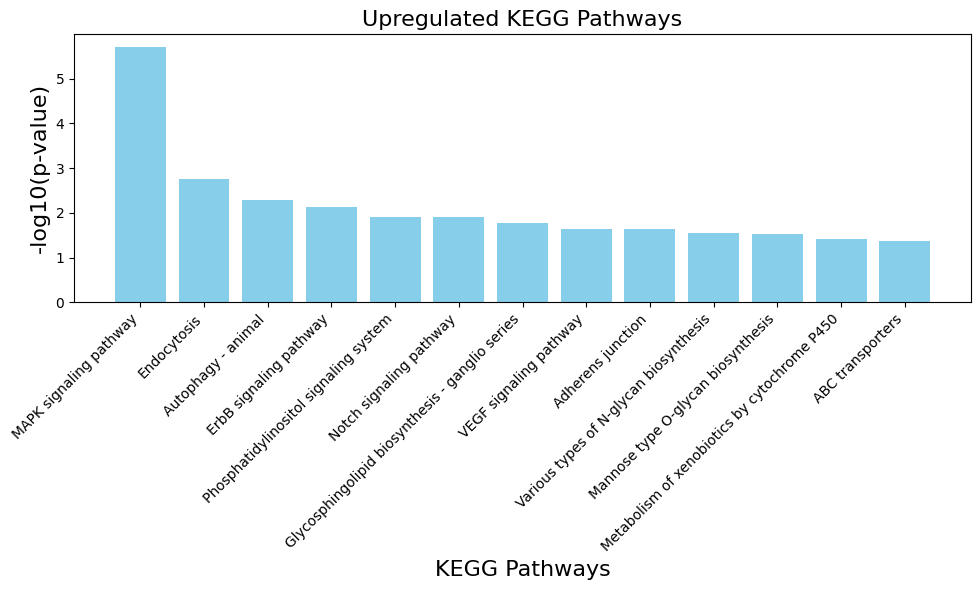

In [22]:
# create a bar chart to visualize the enriched results
enrichplots.bar_chart(upregulated_results,
                      title = 'Upregulated KEGG Pathways',
                      xlab = 'KEGG Pathways',
                      max_num_pathways=20)

#### Testing for Downregulated Pathways

**Contingency Table for Downregulated Genes:**

Assume we are interested in assessing whether a KEGG Pathway (let's call it "Pathway A") is enriched with _downregulated genes_. The contingency table for this scenario would be:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{In Pathway A} & \text{Not In Pathway A} \\
\hline
\text{Downregulated} & a & b \\
\hline
\text{Not Downregulated} & c & d \\
\hline
\end{array}
$$

Here:
- $a$ is the number of genes both in the pathway and downregulated.
- $b$ is the number of genes not in the pathway but downregulated.
- $c$ is the number of genes in the pathway but not downregulated.
- $d$ is the number of genes neither in the pathway nor downregulated.

**Steps 1-6:** You can repeat the steps above to test for down-regulated genes.

In [23]:
downregulated_results = enrich_fishers(gene_universe = gene_universe_tpp, 
                        gene_id_type = ncbi_id,
                        database = database_choice, 
                        direction = 'down'   
                        )
# count the number of significantly altered pathways
num_downregulated = len(downregulated_results)
print(f'The total number of downregulated pathways is {num_downregulated}.')

The total number of downregulated pathways is 40.


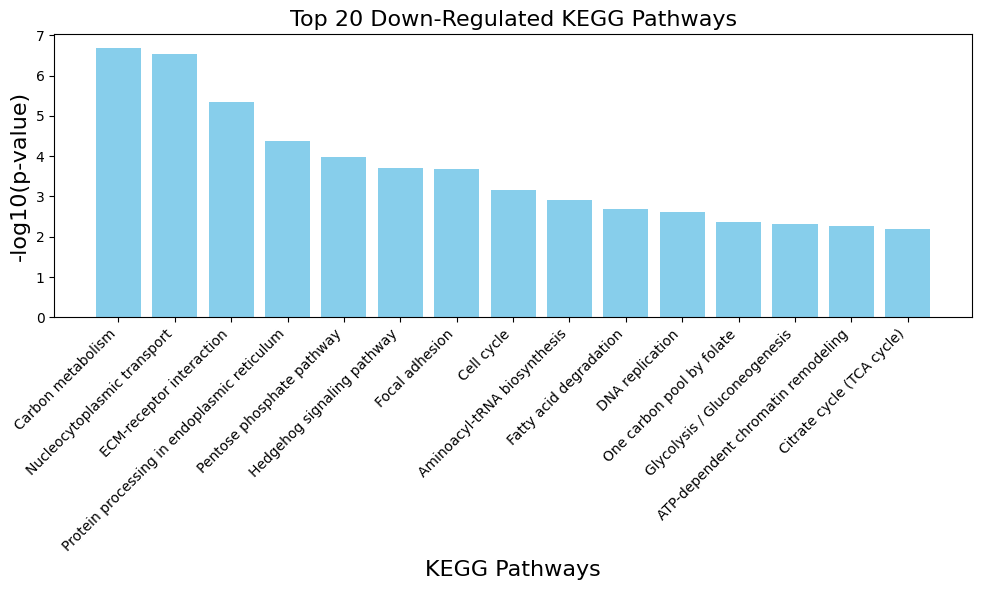

In [24]:
enrichplots.bar_chart(downregulated_results,
                       title = 'Top 20 Down-Regulated KEGG Pathways',
                       xlab = 'KEGG Pathways', 
                       max_num_pathways=15)

#### Advanced Options

The Fisher's Exact Method, as described in the overview, is greatly dependent on the significance threshold. The definition of a gene that is condisered to be significant can depend on a variety of different factors related to your study. A common significane threshold for determining if a gene is considered to be significantly differentially expressed is a combination of both the adjusted p-value (0.05) and the log2FC (|log2FC|>1). If you would like to incorpoorate this into the analysis, you can! 

In [25]:
enrichment_results = enrich_fishers(gene_universe_tpp,
                        database='KEGG Pathway',
                        gene_id_type='NCBI Gene ID',
                        sig_gene_cutoff_pvalue=0.05,
                        log2FC_cutoff_value=1
                        )
# count the number of significantly altered pathways
num_altered = len(enrichment_results)

print(f'The total number of altered pathways is {num_altered}.')

The total number of altered pathways is 7.


As you can see, we have a lot fewer significant pathways (7 here vs 28 above) as the significance threshold is stricter. 

_Note: there are **a lot** more GO Biological Processes then there are KEGG Pathways, therefore, testing for those will take a bit longer._

### Functional Enrichment with Logistic Regression

_Purpose: Conduct functional enrichment analysis using logistic regression to identify overrepresented pathways associated with a set of genes._

This method is ideal for scenarios where you have a gene set of interest and want to explore the significant enrichment of pathways from databases like KEGG and Gene Ontology. Logistic Regression helps reveal statistically significant relationships between the gene set and specific pathways. The logistic regression method is known to have better statistical power than fishers exact test (_Sartor et. al., 2009._)

#### Overview of Logistic Regression for Enrichment Analysis

**Logistic Regression Model:**

The logistic regression method for gene set enrichment analysis involves modeling the log-odds of a gene belonging to a specific category (gene set) as a linear function of the statistical significance (measured by -log(P-values)).

**Statistical Formulas:**

 Here's a breakdown of the key components mentioned in the explanation:

1. **Logistic Regression Model:**

   $$\log\left(\frac{p}{1-p}\right) = \alpha + \beta \cdot x$$

   where:
   - $\log$ is the base 10 logarithm.
   - $p$ is the probability of a gene belonging to the specific category.
   - $\alpha$ is the intercept.
   - $\beta$ is the slope parameter.
   - $x$ is the -log(P-value) used as the explanatory variable.

2. **Odds Ratio:** The odds ratio indicates the change in the odds of a gene belonging to the specific category for a unit increase in the -log(P-value) or a 10-fold decrease in P-value.

   $$ \text{Odds Ratio} = \exp(\beta) $$
   

3. **Wald Test:**
   - The Wald test is used to assess the evidence in the data that $ \beta $ is different from zero.
   - The test statistic $ W $ follows a $\chi^2$-distribution with one degree of freedom.
   - The P-value is calculated based on this null distribution.

4. **Estimation and Testing:**
   - Maximum likelihood estimates $ \hat{\beta} $ and $ \hat{\alpha} $ are obtained using the iteratively weighted least squares (IWLS) algorithm.
   - Testing involves assessing whether $ \beta $ is significantly different from zero.

5. **Ranking:**
   - Gene sets are ranked based on P-values or odds ratios.

This method aims to identify enriched or depleted gene sets based on the statistical significance of their association with differential expression. The odds ratio and P-value provide insights into the strength and significance of this association.


#### Primary Function and Unique Parameters

The primary function is `enrich_logistic` with all the required and advanced parameters discussed above in addition to one unique parameter, `directional_test`.

| Parameter Name | Parameter Type | Parameter Description | 
| -- | -- | -- |
| `directional_test` | `bool` |  Signifying if you would like to preform a directional test (`True`) to test for up/down regulation or a non-directional test (`False`) to test for enrichment/depletion. | 

#### Logistic Regression for the Identification of Up and Down Regulated Pathways

This is the recommended method for analyzing your gene expression data.

**Step 1:** Loading Data. Data should be loaded into a Pandas Dataframe with the structure as describes above. This is defined as your `gene_universe_tpp` as is contains all genes detected in your study.

In [26]:
gene_universe_tpp = pd.read_csv('data/test_data/TPP_DE.txt', sep = '\t')

To get a sneak peak about what the data looks like, we can look at the first 5 elements:

In [27]:
gene_universe_tpp.head(5)

,NCBI Gene ID,PValue,logFC
0,100000006,0.792615,0.115009
1,100000009,0.607285,-0.144714
2,100000026,0.021338,0.603871
3,100000030,0.007880,-2.083141
4,100000044,0.015286,0.803879


**Step 2:** Define necessary parameters and choices. To run the enrichment function, there are some key parameters you have the option of using (see above). 

In [28]:
# the gene id type you have in your gene universe. 
ncbi_id = 'NCBI Gene ID'

# the database you wish to test enrichment for 
database_choice = 'KEGG Pathway'

**Step 3:** Run enrichment function.

In [29]:
result = enrich_logistic(gene_universe = gene_universe_tpp, 
                database = database_choice,
                gene_id_type = ncbi_id                
                )

**Step 4:** Visualize results. In this case, we assessed whether or not a KEGG Pathway was enriched or depleted. This means was there significant up and/or down regulation of a pathway. 

In [30]:
# count the number of significantly altered pathways
num_altered = len(result)
num_upregulated = len(result[result['Direction'] == 'upregulated'])
num_downregulated = len(result[result['Direction'] == 'downregulated'])

print(f'The total number of altered pathways is {num_altered}, the number upregulated is {num_upregulated}, and the number downregulated is {num_downregulated}.')

The total number of altered pathways is 56, the number upregulated is 14, and the number downregulated is 42.


In [31]:
%%capture
# visualize the top 5 most significantly altered KEGG pathways
# Markdown(result.head(5).to_markdown())
result.head(5)

|    | Concept Type   | Concept ID   | Concept Name                 |   # Genes in Concept in Universe |   # Sig Genes Belong to Concept |   Proportion of Sig Genes in Set |   Odds Ratio |     P-value | Direction      |
|---:|:---------------|:-------------|:-----------------------------|---------------------------------:|--------------------------------:|---------------------------------:|-------------:|------------:|:---------------|
|  0 | KEGG Pathway   | dre03013     | Nucleocytoplasmic transport  |                              100 |                              26 |                         0.26     |     0.691623 | 3.00369e-10 | downregulated |
|  1 | KEGG Pathway   | dre01200     | Carbon metabolism            |                              124 |                              30 |                         0.241935 |     0.708663 | 3.32419e-10 | downregulated |
|  2 | KEGG Pathway   | dre00970     | Aminoacyl-tRNA biosynthesis  |                               51 |                              12 |                         0.235294 |     0.680409 | 9.18624e-07 | downregulated |
|  3 | KEGG Pathway   | dre04110     | Cell cycle                   |                              177 |                              29 |                         0.163842 |     0.783967 | 3.68528e-06 | downregulated |
|  4 | KEGG Pathway   | dre00010     | Glycolysis / Gluconeogenesis |                               75 |                              14 |                         0.186667 |     0.725094 | 7.87168e-06 | downregulated |

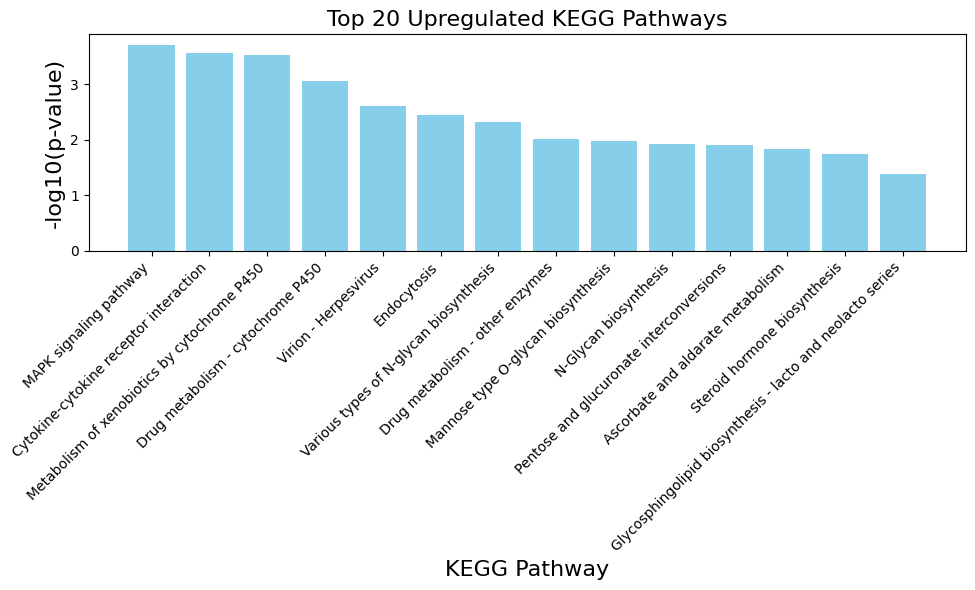

In [32]:
# create a bar chart to visualize the enriched results
upregulated_results = result[result['Direction'] == 'upregulated']

enrichplots.bar_chart(upregulated_results, 
                      title = 'Top 20 Upregulated KEGG Pathways', 
                      xlab = 'KEGG Pathway',
                      max_num_pathways=20)

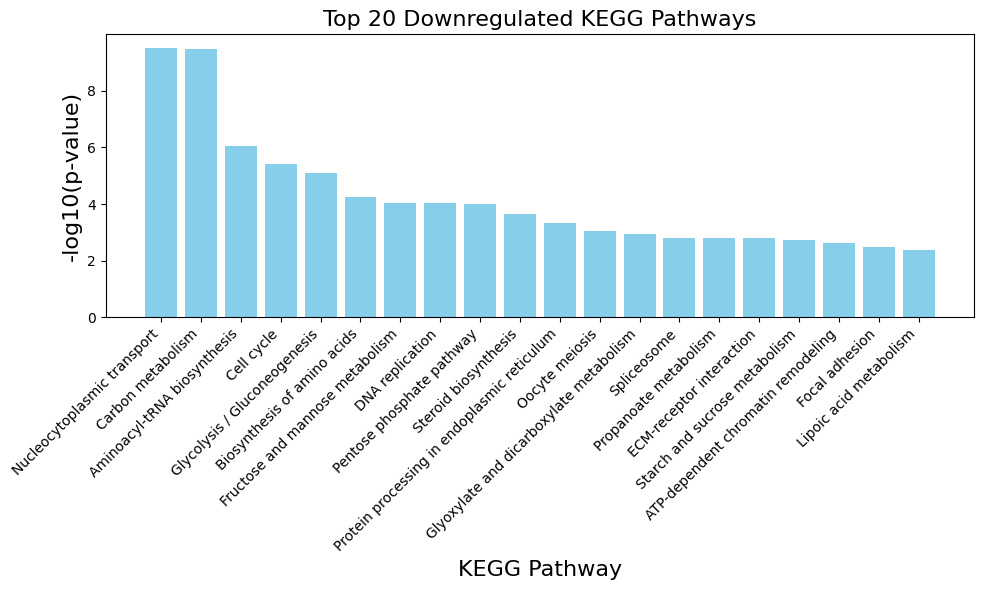

In [33]:
# create a bar chart to visualize the enriched results
downregulated_results = result[result['Direction'] == 'downregulated']

enrichplots.bar_chart(downregulated_results, 
                      title = 'Top 20 Downregulated KEGG Pathways', 
                      xlab = 'KEGG Pathway',
                      max_num_pathways=20)

#### Conduct Logistic Regression for Enrichment Analysis (enriched/depleted)

**Step 1:** Loading Data. Data should be loaded into a Pandas Dataframe with the structure as describes above. This is defined as your `gene_universe_tpp` as is contains all genes detected in your study.

In [34]:
gene_universe_tpp = pd.read_csv('data/test_data/TPP_DE.txt', sep = '\t')

**Step 2:** Define necessary parameters and choices. To run the enrichment function, there are some key parameters you have the option of using (see above). 

In [35]:
# the gene id type you have in your gene universe. 
# In this case, we have NCBI Gene IDs. 
ncbi_id = 'NCBI Gene ID'

# the database you wish to test enrichment for 
database_choice = 'KEGG Pathway'


**Step 3:** Run enrichment function.

In [36]:
result = enrich_logistic(gene_universe = gene_universe_tpp, 
                database = database_choice,
                gene_id_type = ncbi_id,
                directional_test = False
                )

**Step 4:** Visualize results. In this case, we assessed whether or not a KEGG Pathway was enriched or depleted. This means was there significant up and/or down regulation of a pathway. 

In [37]:
# count the number of significantly altered pathways
num_altered = len(result)
num_enriched = len(result[result['Direction'] == 'enriched'])
num_depleted = len(result[result['Direction'] == 'depleted'])

print(f'The total number of altered pathways is {num_altered}, the number enriched is {num_enriched}, and the number depleted is {num_depleted}.')

The total number of altered pathways is 39, the number enriched is 34, and the number depleted is 5.


In [38]:
%%capture
# visualize the top 5 most significantly altered KEGG pathways
# Markdown(result.head(5).to_markdown())
result.head(5)

|    | Concept Type   | Concept ID   | Concept Name              |   # Genes in Concept in Universe |   # Sig Genes Belong to Concept |   Proportion of Sig Genes in Set |   Odds Ratio |     P-value | Direction   |
|---:|:---------------|:-------------|:--------------------------|---------------------------------:|--------------------------------:|---------------------------------:|-------------:|------------:|:------------|
|  0 | KEGG Pathway   | dre00030     | Pentose phosphate pathway |                               29 |                              15 |                         0.517241 |      1.46137 | 3.93196e-06 | enriched    |
|  1 | KEGG Pathway   | dre04510     | Focal adhesion            |                              264 |                              69 |                         0.261364 |      1.2104  | 2.00369e-05 | enriched    |
|  2 | KEGG Pathway   | dre04512     | ECM-receptor interaction  |                              101 |                              35 |                         0.346535 |      1.29626 | 2.32985e-05 | enriched    |
|  3 | KEGG Pathway   | dre00860     | Porphyrin metabolism      |                               39 |                              10 |                         0.25641  |      1.3912  | 4.70928e-05 | enriched    |
|  4 | KEGG Pathway   | dre04010     | MAPK signaling pathway    |                              377 |                              95 |                         0.251989 |      1.16901 | 0.000106494 | enriched    |

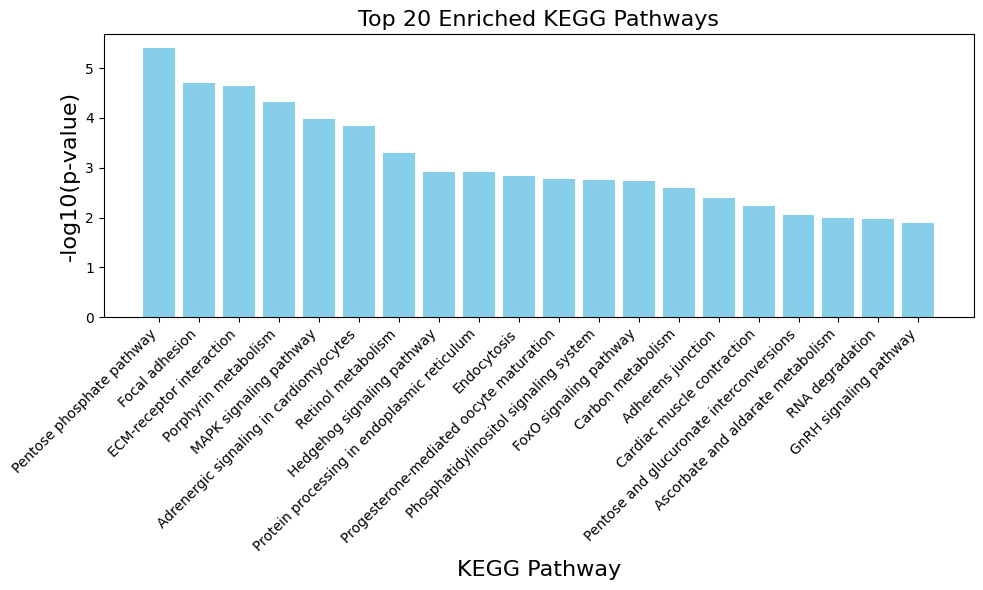

In [39]:
# create a bar chart to visualize the enriched results
enriched_results = result[result['Direction'] == 'enriched']

enrichplots.bar_chart(enriched_results, 
                      title = 'Top 20 Enriched KEGG Pathways', 
                      xlab = 'KEGG Pathway',
                      max_num_pathways=20)

If you were to compare these results with those of Fisher's Exact Test above, you would notice many of the significant pathways show up in both methods.

### Functional Enrichment via Orthology

_Purpose: Conduct functional enrichment analysis via orthology to identify overrepresented pathways in zebrafish associated with a set of genes that have been originally annotated for human._

This method is ideal for scenarios where you want to leverage existing knowledge from the well-annotated species, humans, and apply it to the less-studied organism, zebrafish. Orthology-based functional enrichment allows you to transfer annotations and pathway information from humamns, where extensive functional genomics studies have been conducted, to the target species of zebrafish. In the context of zebrafish, which may have fewer experimentally validated annotations, leveraging orthologous relationships helps bridge the gap in functional understanding. 

In `danRerLib`, the organism `dreM` stands for _Danio rerio_ mapped, meaning the zebrafish genome has been mapped to human via orthology. Therefore, we can conduct the same steps as shown above but choose the `dreM` organism to conduct functional enrichment via orthology.

#### Conduct Logistic Regression for Enrichment Analysis

**Step 1:** Loading Data. Data should be loaded into a Pandas Dataframe with the structure as describes above. This is defined as your `gene_universe_tpp` as is contains all genes detected in your study.

In [40]:
gene_universe_tpp = pd.read_csv('data/test_data/TPP_DE.txt', sep = '\t')

**Step 2:** Define necessary parameters and choices. To run the enrichment function, there are some key parameters you have the option of using (see above). 

In [41]:
# the gene id type you have in your gene universe. 
# In this case, we have NCBI Gene IDs. 
ncbi_id = 'NCBI Gene ID'

# the database you wish to test enrichment for 
database_choice = 'KEGG Pathway'

# organism - for orthology we want to choose 'dreM'
organism_for_orthology = 'dreM'

**Step 3:** Run enrichment function.

In [42]:
result = enrich_logistic(gene_universe = gene_universe_tpp, 
                gene_id_type = ncbi_id,
                database = database_choice, 
                org = organism_for_orthology 
                )

**Step 4:** Visualize results. In this case, we assessed whether or not a KEGG Pathway was up or downregulated. 

In [43]:
# count the number of significantly altered pathways
num_altered = len(result)
num_upregulated = len(result[result['Direction'] == 'upregulated'])
num_downregulated = len(result[result['Direction'] == 'downregulated'])

print(f'The total number of altered pathways is {num_altered}, the number upregulated is {num_upregulated}, and the number downregulated is {num_downregulated}.')

The total number of altered pathways is 81, the number upregulated is 17, and the number downregulated is 64.


As you can see based on the analysis done above with the default organism of `dre`, we have detected more significanly altered pathways via orthology. This is because the number of KEGG Pathways that are annotated for human greatly out numbers those of zebrafish.

In [44]:
fun = KEGG._get_total_number_kegg

print(f'Total Number dre: {fun("dre", "pathway")}')
print(f'Total Number dreM: {fun("dreM", "pathway")}')
print(f'Total Number hsa: {fun("hsa", "pathway")}')

Total Number dre: 177
Total Number dreM: 355
Total Number hsa: 355


As you can see, _Danio rerio_ (`dre`) only has 177 annotated pathways while human (`hsa`) has 355; therefore, mapped zebrafish via orthology (`dreM`) has 355 annotated pathways as well. 

In [45]:
%%capture
# visualize the top 5 most significantly altered KEGG pathways
# Markdown(result.head(5).to_markdown())
result.head(5)

|    | Concept Type   | Concept ID   | Concept Name                    |   # Genes in Concept in Universe |   # Sig Genes Belong to Concept |   Proportion of Sig Genes in Set |   Odds Ratio |     P-value | Direction      |
|---:|:---------------|:-------------|:--------------------------------|---------------------------------:|--------------------------------:|---------------------------------:|-------------:|------------:|:---------------|
|  0 | KEGG Pathway   | dreM01200    | Carbon metabolism               |                              117 |                              30 |                         0.25641  |     0.697511 | 6.15744e-11 | downregulated |
|  1 | KEGG Pathway   | dreM03013    | Nucleocytoplasmic transport     |                               94 |                              22 |                         0.234043 |     0.704551 | 1.54716e-08 | downregulated |
|  2 | KEGG Pathway   | dreM00970    | Aminoacyl-tRNA biosynthesis     |                               38 |                              10 |                         0.263158 |     0.654383 | 5.35405e-07 | downregulated |
|  3 | KEGG Pathway   | dreM00010    | Glycolysis / Gluconeogenesis    |                               68 |                              14 |                         0.205882 |     0.705103 | 1.35445e-06 | downregulated |
|  4 | KEGG Pathway   | dreM00051    | Fructose and mannose metabolism |                               38 |                               9 |                         0.236842 |     0.677058 | 1.35243e-05 | downregulated |

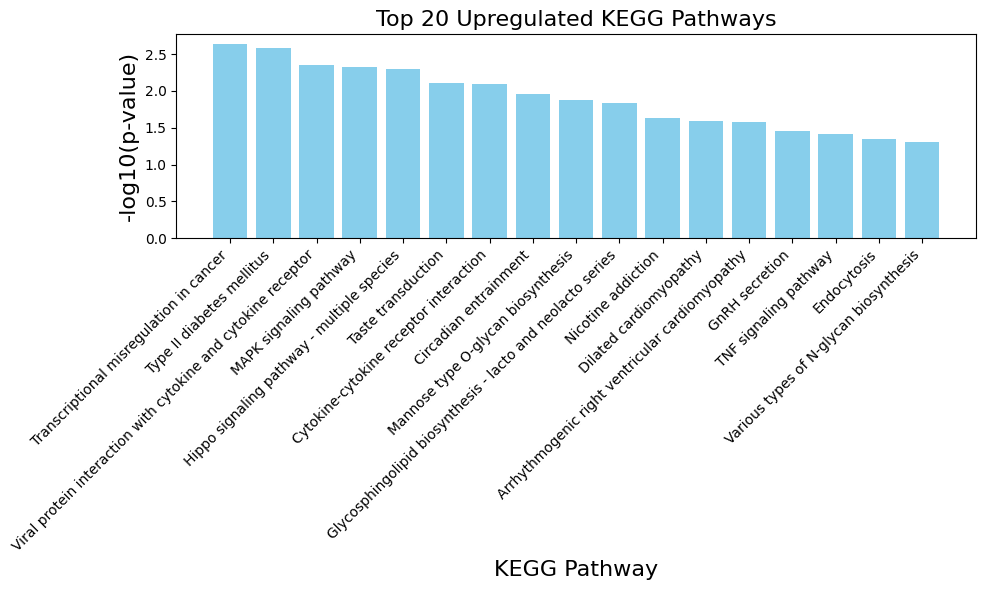

In [46]:
# create a bar chart to visualize the enriched results
upregulated_results = result[result['Direction'] == 'upregulated']

enrichplots.bar_chart(upregulated_results, 
                      title = 'Top 20 Upregulated KEGG Pathways', 
                      xlab = 'KEGG Pathway',
                      max_num_pathways=20)

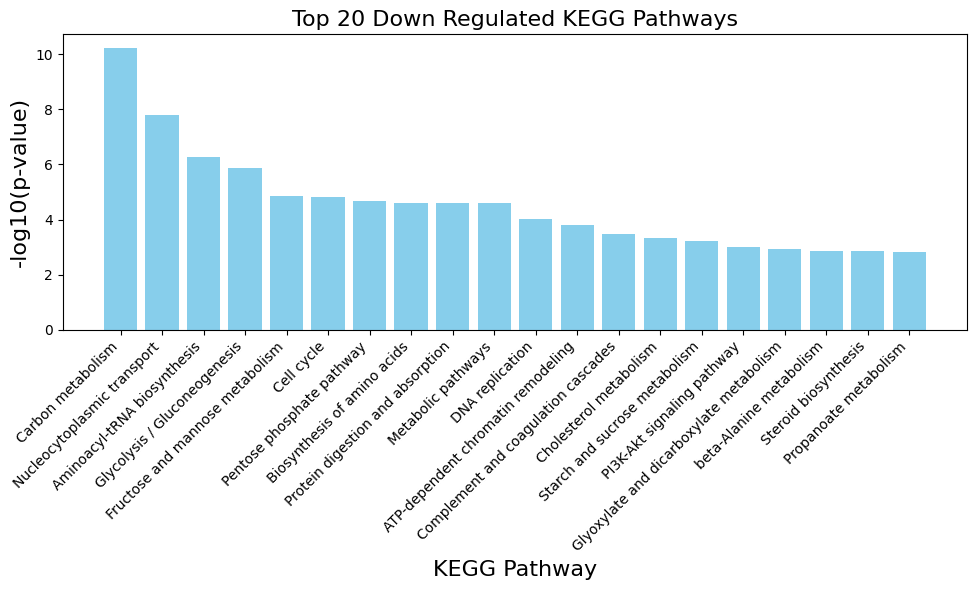

In [47]:
# create a bar chart to visualize the enriched results
downregulated_results = result[result['Direction'] == 'downregulated']

enrichplots.bar_chart(downregulated_results, 
                      title = 'Top 20 Down Regulated KEGG Pathways', 
                      xlab = 'KEGG Pathway',
                      max_num_pathways=20)

## Glossary

_Enriched Pathway_: An enriched pathway refers to a biological pathway that contains a statistically significant number of genes that show altered expression under a particular experimental condition, irregardless of the gene being up or down regulated. For example, if you perform gene expression analysis comparing two conditions (e.g., control vs. treatment) and find that a specific biological pathway has a higher-than-expected number of genes with altered expression, you would say that pathway is enriched.

_Depleted Pathway_: A depleted pathway is the opposite of an enriched pathway. It refers to a biological pathway that contains a statistically significant number of genes with lower expression than expected under the given experimental condition, irregardless of the gene being up or down regulated. For example, if a biological pathway shows a lower-than-expected number of genes with altered expression in your analysis, that pathway is considered depleted.

_Upregulated Pathway_: An upregulated pathway refers to a biological pathway where the majority of genes have increased expression levels under a specific experimental condition. For example, if you find that most genes in a particular pathway have higher expression levels in the treatment group compared to the control group, that pathway is considered upregulated.

_Downregulated Pathway_: A downregulated pathway is the opposite of an upregulated pathway. It indicates a biological pathway where the majority of genes have decreased expression levels under the experimental condition being studied. For example, if most genes in a pathway exhibit lower expression levels in the treatment group compared to the control group, that pathway is considered downregulated.

## Conclusion

This concludes the functional enrichment tutorial! In summary, the key functions in this library for enrichment are:

| function | purpose |
| - | - | 
|enrich_fishers | conduct functional enrichment using the fishers exact method |
|enrich_logistic | conduct functional enrichment using the logistic regression method |


For more information about the full functionality of each function, please refer to the API Reference.

### References

- Sartor, M. A., Leikauf, G. D., & Medvedovic, M. (2009). LRpath: a logistic regression approach for identifying enriched biological groups in gene expression data. Bioinformatics (Oxford, England), 25(2), 211–217.